In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns


electric_cars_to_load = Path("Resources/Electric_Vehicle_Population_Data.csv")
#population_to_load= Path("Resources/Electric_Vehicle_Population_Size_History_By_County.csv")

electric_car_data = pd.read_csv(electric_cars_to_load)
#population_data=pd.read_csv(population_to_load)

electric_car_data.head()
#population_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [6]:
group_models=electric_car_data.groupby('Model Year')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(group_models)

Model Year  Clean Alternative Fuel Vehicle (CAFV) Eligibility           
1997        Clean Alternative Fuel Vehicle Eligible                             1
1998        Clean Alternative Fuel Vehicle Eligible                             1
1999        Clean Alternative Fuel Vehicle Eligible                             5
2000        Clean Alternative Fuel Vehicle Eligible                             7
2002        Clean Alternative Fuel Vehicle Eligible                             2
2003        Clean Alternative Fuel Vehicle Eligible                             1
2008        Clean Alternative Fuel Vehicle Eligible                            21
2010        Clean Alternative Fuel Vehicle Eligible                            24
2011        Clean Alternative Fuel Vehicle Eligible                           736
2012        Clean Alternative Fuel Vehicle Eligible                          1217
            Not eligible due to low battery range                             378
2013        Clean Alterna

In [2]:
total_cars = len(electric_car_data)
total_cars

191407

In [3]:
ev_city = electric_car_data["City"].value_counts()
ev_city.head(15)

City
Seattle       31436
Bellevue       9582
Redmond        6883
Vancouver      6744
Bothell        6278
Kirkland       5709
Sammamish      5595
Renton         5584
Olympia        4600
Tacoma         4011
Tukwila        3182
Bellingham     3171
Kent           3050
Issaquah       2958
Spokane        2950
Name: count, dtype: int64

In [4]:
unique_cars=electric_car_data["Make"].nunique()
unique_cars

42

In [5]:
per_make_counts = electric_car_data["Make"].value_counts()
 
per_make_counts.head(15)

Make
TESLA            84670
CHEVROLET        14321
NISSAN           14239
FORD             10048
KIA               8671
BMW               7993
TOYOTA            7181
VOLKSWAGEN        5408
JEEP              4996
HYUNDAI           4977
RIVIAN            4751
VOLVO             4469
AUDI              3890
CHRYSLER          3393
MERCEDES-BENZ     1784
Name: count, dtype: int64

In [6]:
model_year=electric_car_data["Model Year"].value_counts()
model_year.head(10)

Model Year
2023    60084
2022    28116
2021    19531
2024    16963
2018    14340
2020    12149
2019    10933
2017     8650
2016     5528
2015     4818
Name: count, dtype: int64

In [11]:
#What is the amount of cars that are eligible from a Tax Credit vs Not Eligible

eligible_ev_cars = electric_car_data[electric_car_data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]

# Count the number of eligible cars
num_eligible_cars = len(eligible_ev_cars)

# Count the total number of cars
total_cars = len(electric_car_data)

# Calculate the number of cars that are not eligible
num_not_eligible_cars = total_cars - num_eligible_cars

# Print the summary
print(f"Number of cars eligible for the tax credit: {num_eligible_cars}")
print(f"Number of cars not eligible for the tax credit: {num_not_eligible_cars}")

Number of cars eligible for the tax credit: 68785
Number of cars not eligible for the tax credit: 122622


In [12]:
percentage_eligible = int((num_eligible_cars / total_cars) * 100)
percentage_not_eligible =int((num_not_eligible_cars / total_cars) * 100)
print(percentage_eligible)
print(percentage_not_eligible)

35
64


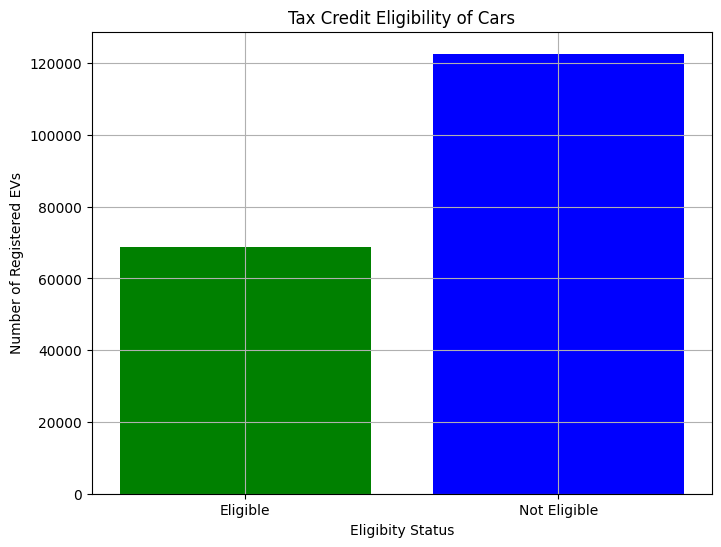

In [9]:
categories = ['Eligible', 'Not Eligible'] 
values = [68785, 122622] 
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'blue'])

plt.savefig("output_data/Fig1.png")
plt.grid(True)
plt.xlabel('Eligibity Status') 
plt.ylabel('Number of Registered EVs') 
plt.title('Tax Credit Eligibility of Cars') 
plt.show()

In [10]:
Eligibility for CAFVs can vary depending on the context, such as government incentives, tax credits, regulatory definitions, or programs aimed at 
promoting environmentally friendly transportation.


SyntaxError: invalid syntax (2500321735.py, line 1)

In [11]:
#Find the Total Legislative Districts 
legislative_districts = electric_car_data["Legislative District"].nunique()
legislative_districts


49

Model Year
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16963
Name: count, dtype: int64


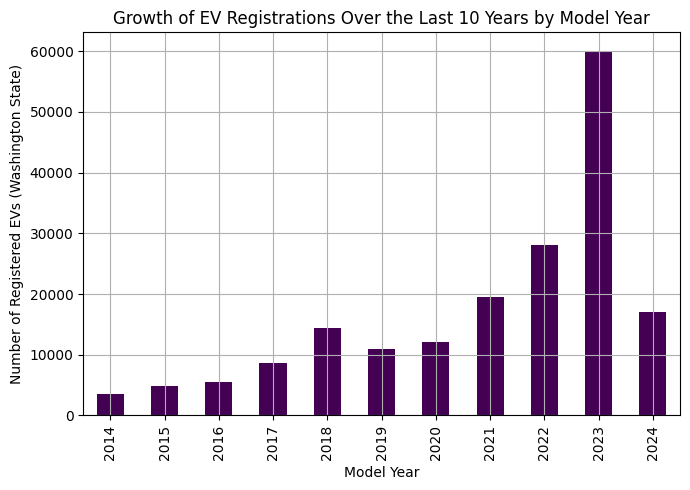

In [8]:

# Determine the current year
current_year = pd.to_datetime('now').year

# Extract data for the last 10 years
last_10_years = range(current_year - 10, current_year + 1)
recent_ev_data = electric_car_data[electric_car_data['Model Year'].isin(last_10_years)]

# Count the number of cars registered each year
model_year_counts = recent_ev_data['Model Year'].value_counts().sort_index()

# Display the counts
print(model_year_counts)

# Plot the growth of EV registrations over the last 10 years
model_year_counts.plot(kind='bar', stacked=True, figsize=(7, 5),colormap='viridis')
plt.title('Growth of EV Registrations Over the Last 10 Years by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registered EVs (Washington State)')
plt.grid(True)
plt.tight_layout()
plt.savefig("output_data/Fig2.png")
# Save the plot as an image file
#plt.savefig('ev_growth_last_10_years.png')

# Show the plot
plt.show()


In [13]:

data = {
    'Year': last_10_years,
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': num_eligible_cars,
    'Registered Cars': total_cars
}
df = pd.DataFrame(data)

# Add a constant to the independent variable (tax credits)
X = sm.add_constant(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Dependent variable (registered cars)
y = df['Registered Cars']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Registered Cars   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                nan
Time:                        11:17:15   Log-Likelihood:                    inf
No. Observations:                  11   AIC:                              -inf
Df Residuals:                      10   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [14]:
model_size=electric_car_data.groupby('Model Year').size()
model_size

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1595
2013     4363
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16963
2025        6
dtype: int64

In [18]:
eligibility_df=electric_car_data[electric_car_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']==\
                                                    'Clean Alternative Fuel Vehicle Eligible']


eligible_by_year=eligibility_df.groupby('Model Year').size()

eligible_by_year



Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1217
2013     3551
2014     2759
2015     4151
2016     4176
2017     6379
2018    12013
2019     9349
2020    10669
2021     2292
2022     2420
2023     5304
2024     3706
2025        1
dtype: int64

In [20]:
regression_dataframe=pd.DataFrame({
    'Total Number of Vehicles': model_size,
    'Eligible Vehicles': eligible_by_year}).reset_index()

print(regression_dataframe)

    Model Year  Total Number of Vehicles  Eligible Vehicles
0         1997                         1                  1
1         1998                         1                  1
2         1999                         5                  5
3         2000                         7                  7
4         2002                         2                  2
5         2003                         1                  1
6         2008                        21                 21
7         2010                        24                 24
8         2011                       736                736
9         2012                      1595               1217
10        2013                      4363               3551
11        2014                      3533               2759
12        2015                      4818               4151
13        2016                      5528               4176
14        2017                      8650               6379
15        2018                     14340

Slope (Coefficient): 0.109901083057517
Intercept: 2076.050582400428


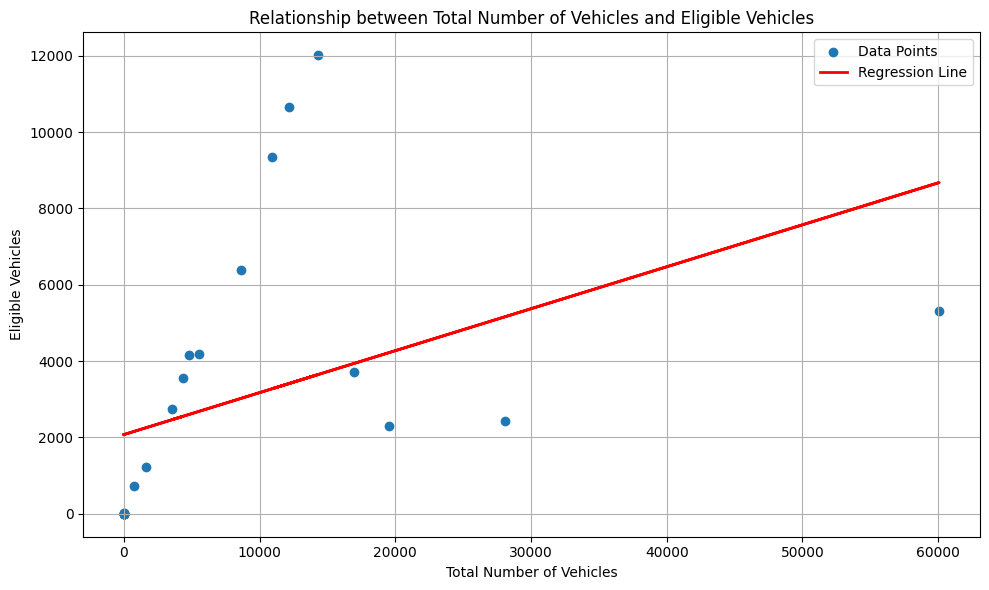

In [31]:
regression_model=LinearRegression()
regression_model.fit(regression_dataframe[['Total Number of Vehicles']],regression_dataframe['Eligible Vehicles'])
slope=regression_model.coef_[0]
intercept = regression_model.intercept_


print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10, 6))
plt.scatter(regression_dataframe['Total Number of Vehicles'],regression_dataframe['Eligible Vehicles'] , label='Data Points')

# Plotting the regression line
plt.plot(regression_dataframe[['Total Number of Vehicles']], regression_model.predict(regression_dataframe[['Total Number of Vehicles']]), color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.title('Relationship between Total Number of Vehicles and Eligible Vehicles')
plt.xlabel('Total Number of Vehicles')
plt.ylabel('Eligible Vehicles')
plt.legend()
plt.savefig("output_data/Fig4.png")
# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
Stats Summary: In summary, the output indicates that Clean Alternative Fuel Vehicle (CAFV) Eligibility has a statistically 
significant and positive effect on Registered Cars according to your regression analysis. The coefficient 2.7827 
suggests that, on average, an increase in Clean Alternative Fuel Vehicle (CAFV) Eligibility is associated with an 
increase in Registered Cars by approximately 2.7827 units, with high confidence based on the provided statistical tests.


In [28]:
years = last_10_years 
values_eligible =len(num_eligible_cars)
values_not_eligible =len(num_not_eligible_cars)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, values_eligible, marker='o', linestyle='-', color='b', label='Eligible')
plt.plot(years, values_not_eligible, marker='o', linestyle='-', color='g', label='Not Eligible')

# Customizations
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Number of Registered EVs')
plt.title('Comparison of Registered EVs (Eligible vs Not Eligible)')
plt.xticks(years)  # Ensure all years are displayed on the x-axis

# Show legend
plt.legend()

# Save and display plot
plt.savefig("output_data/Comparison_Reg_EV.png")
plt.show()




TypeError: object of type 'int' has no len()

In [29]:


# Filter the data for Nissan vehicles
nissan_data = electric_car_data[electric_car_data["Make"] == "NISSAN"]

# Count the occurrences of each Nissan model
nissan_model_counts = nissan_data["Model"].value_counts()

# Check if nissan_model_counts is not empty before finding the most popular model
if not nissan_model_counts.empty:
    most_popular_nissan_model = nissan_model_counts.idxmax()
    most_popular_nissan_count = nissan_model_counts.max()
    print(f"The most popular Nissan model is {most_popular_nissan_model} with {most_popular_nissan_count} registrations.")
else:
    print("No Nissan models found in the dataset.")



The most popular Nissan model is LEAF with 13439 registrations.


In [ ]:

make_counts = electric_car_data["Make"].value_counts()

# Identify the top 4 car makes
top_4_makes = make_counts.head(4)

print("Top 4 car makes in EV registrations:")
print(top_4_makes)

# For each of the top 4 makes, find the most popular model
for make in top_4_makes.index:
    make_data = electric_car_data[electric_car_data["Make"] == make]
    model_counts = make_data["Model"].value_counts()
    
    if not model_counts.empty:
        most_popular_model = model_counts.idxmax()
        most_popular_count = model_counts.max()
        print(f"The most popular model for {make} is {most_popular_model} with {most_popular_count} registrations.")
    else:
        print(f"No models found for make {make} in the dataset.")


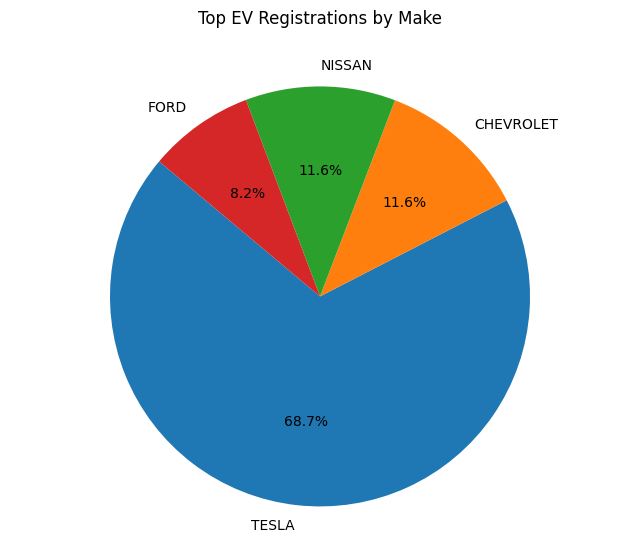

In [30]:

labels = ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD']
sizes = [84670, 14321, 14239, 10048]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for each slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.savefig("output_data/Fig3.png")
# Add title
plt.title('Top EV Registrations by Make', pad=30)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
